[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
C:\Users\rusla\AppData\Local\Temp\ipykernel_7620\1546569650.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data.csv', parse_dates=['review_date'], dayfirst=True)


0                                           отлично 🔥👍
1                                              отлично
2    все отлично. пришло все целое. это уже третий ...
3                    Пока работает, дальше видно будет
4                                                класс
Name: review_text, dtype: object


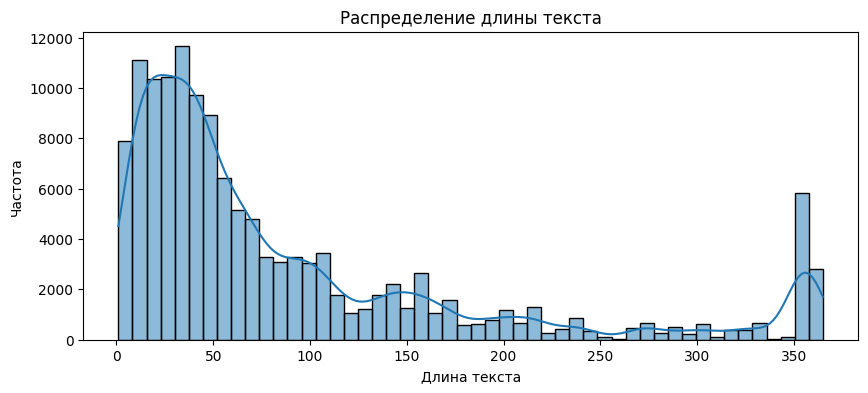

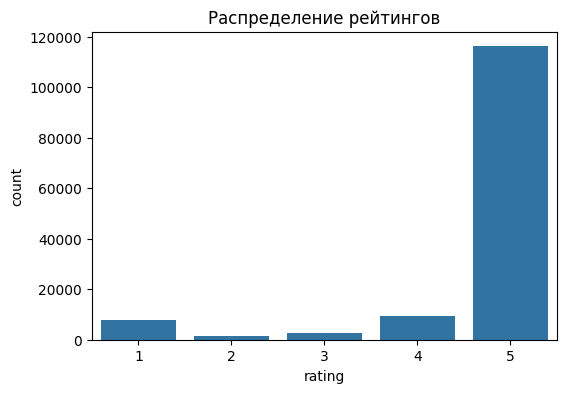

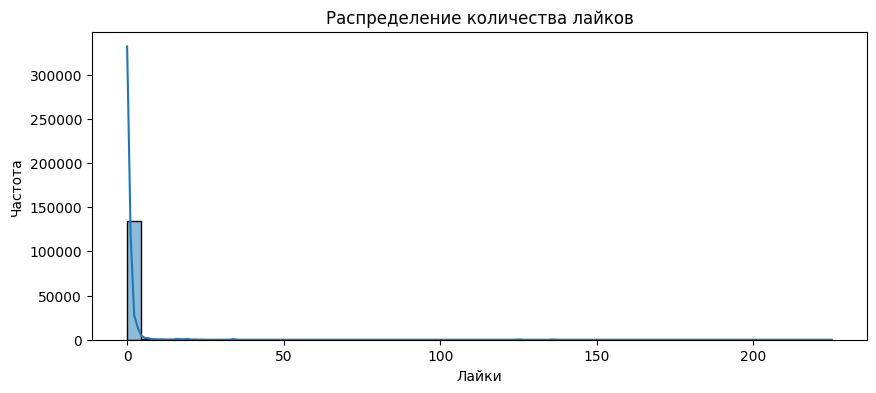

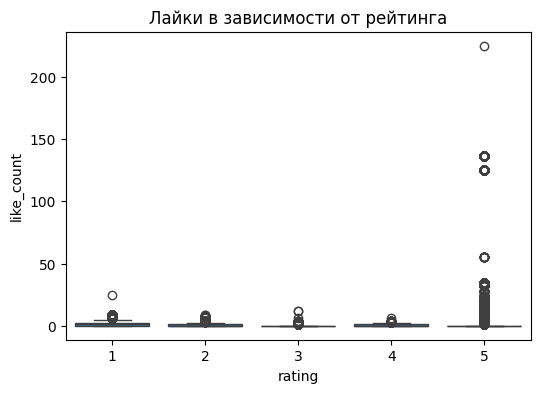

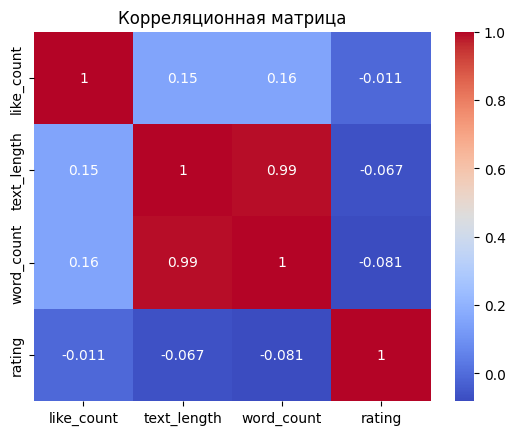

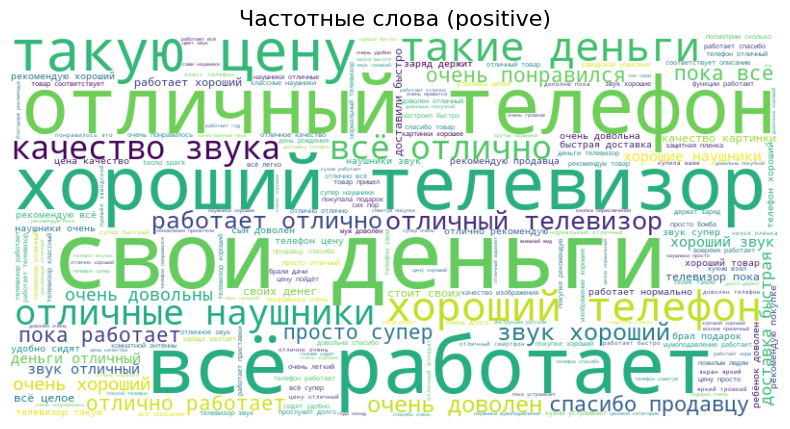

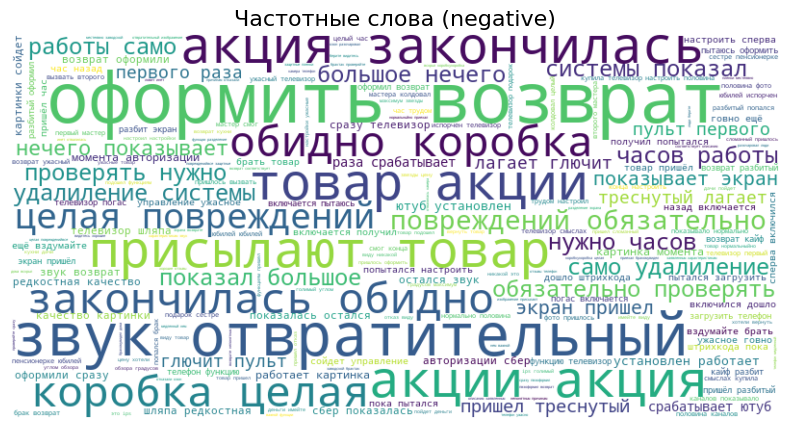

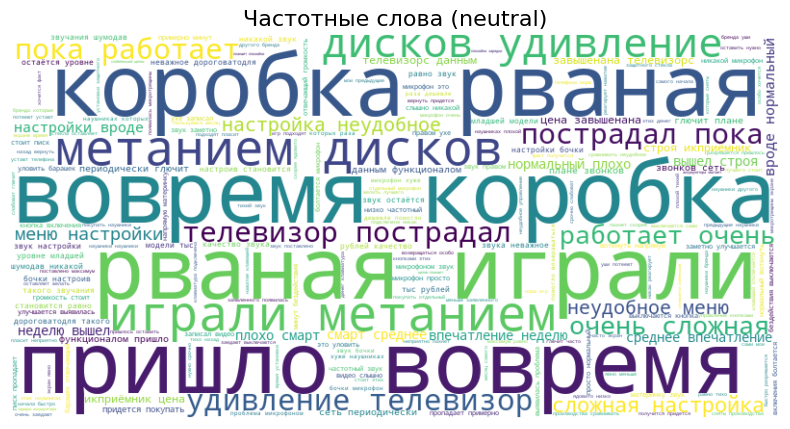

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Загрузка данных
# df = pd.read_csv('data.csv', parse_dates=['review_date'], dayfirst=True)
df = pd.read_csv('res.csv', parse_dates=['review_date'], dayfirst=True)

# Предобработка
df['text_length'] = df['review_text'].astype(str).apply(len)
df['word_count'] = df['review_text'].astype(str).apply(lambda x: len(x.split()))
df['rating'] = df['rating'].astype(int)

# Удаление пропусков
df.dropna(subset=['review_text', 'rating', 'like_count'], inplace=True)

# Добавим тональность на основе оценки
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

# --- Анализ текста ---
print(df['review_text'].head())

# Распределение длины текста
plt.figure(figsize=(10, 4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Распределение длины текста')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

# Распределение оценки
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df)
plt.title('Распределение рейтингов')
plt.show()

# Распределение лайков
plt.figure(figsize=(10, 4))
sns.histplot(df['like_count'], bins=50, kde=True)
plt.title('Распределение количества лайков')
plt.xlabel('Лайки')
plt.ylabel('Частота')
plt.show()

# Связь рейтинга и лайков
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='like_count', data=df)
plt.title('Лайки в зависимости от рейтинга')
plt.show()

# Корреляции
corr = df[['like_count', 'text_length', 'word_count', 'rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# WordCloud по тональностям
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['review_text'].dropna().astype(str))
    text = re.sub(r'[^\w\s]', '', text.lower())  # очистка от знаков
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Частотные слова ({sentiment})', fontsize=16)
    plt.axis('off')
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')
generate_wordcloud('neutral')


In [9]:
df.head()

,review_text,review_date,rating,like_count,text_length,word_count
0,отлично 🔥👍,22 июня 2025,5,0,10,2
1,отлично,22 июня 2025,5,0,7,1
2,все отлично. пришло все целое. это уже третий ...,22 июня 2025,5,1,73,13
3,"Пока работает, дальше видно будет",22 июня 2025,5,1,33,5
4,класс,22 июня 2025,5,0,5,1


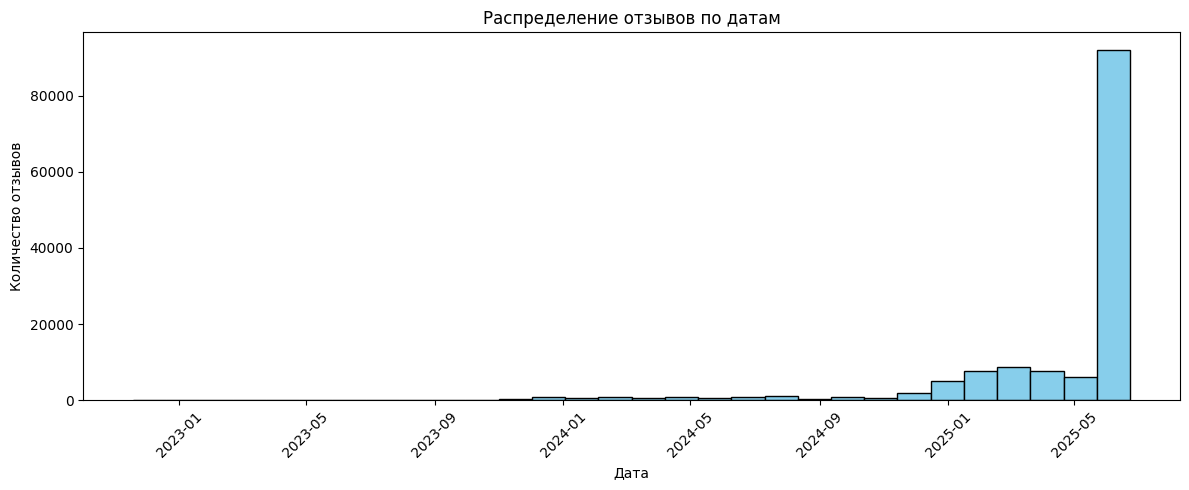

In [10]:
months = {
    'января': 'January', 'февраля': 'February', 'марта': 'March',
    'апреля': 'April', 'мая': 'May', 'июня': 'June',
    'июля': 'July', 'августа': 'August', 'сентября': 'September',
    'октября': 'October', 'ноября': 'November', 'декабря': 'December'
}

def replace_month(text):
    text = re.sub(r'\bизменен\b', '', text, flags=re.IGNORECASE).strip()
    for ru, en in months.items():
        if ru in text:
            return text.replace(ru, en)
    return text

# Заменяем месяц
df['review_date_en'] = df['review_date'].apply(replace_month)

# Парсим дату
df['review_date_parsed'] = pd.to_datetime(df['review_date_en'], format='%d %B %Y', errors='coerce')


# Построение распределения
plt.figure(figsize=(12,5))
plt.hist(df['review_date_parsed'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение отзывов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

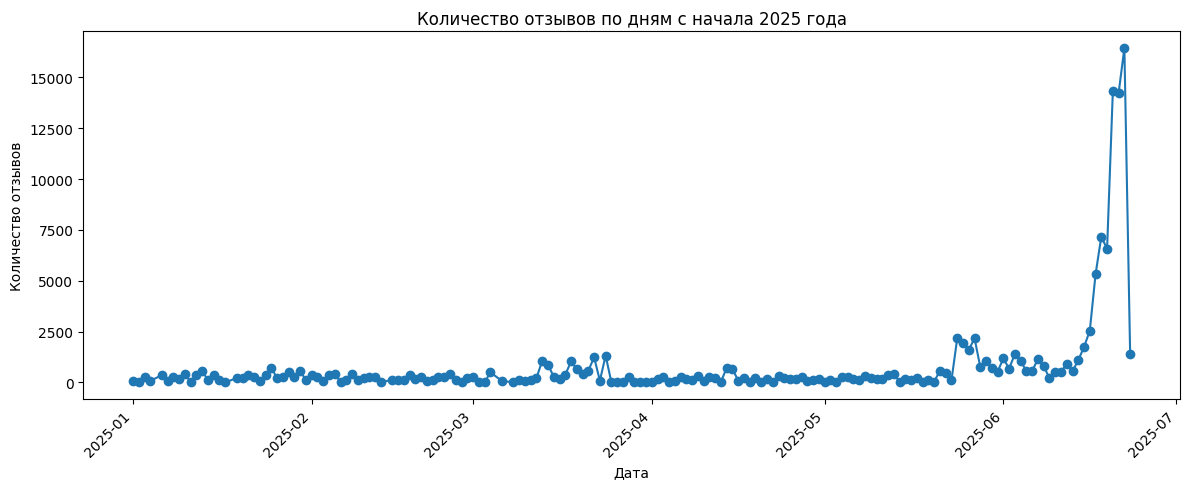

In [11]:
import matplotlib.pyplot as plt

# Фильтр по дате — оставляем с 1 января 2025 и дальше
start_date = pd.Timestamp('2025-01-01')
df_filtered = df[df['review_date_parsed'] >= start_date]

# Группируем по дате и считаем количество отзывов
daily_counts = df_filtered.groupby('review_date_parsed').size()

# Визуализация
plt.figure(figsize=(12,5))
daily_counts.plot(kind='line', marker='o')
plt.title('Количество отзывов по дням с начала 2025 года')
plt.xlabel('Дата')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
